In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Palmer Penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins_df = pd.read_csv(url)

# Display the number of missing values in each column
print("Missing values before preprocessing:\n", penguins_df.isnull().sum())

# Handle missing values

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['species', 'island', 'sex']

# Impute missing values for numerical features with median
numerical_imputer = SimpleImputer(strategy='median')
penguins_df[numerical_features] = numerical_imputer.fit_transform(penguins_df[numerical_features])

# Impute missing values for categorical features with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
penguins_df[categorical_features] = categorical_imputer.fit_transform(penguins_df[categorical_features])

# Encode categorical variables
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    penguins_df[feature] = label_encoders[feature].fit_transform(penguins_df[feature])

# Split the dataset into training and testing sets
X = penguins_df.drop('species', axis=1)  # Features
y = penguins_df['species']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Display the number of missing values after preprocessing
print("\nMissing values after preprocessing:\n", penguins_df.isnull().sum())

# Display the preprocessed dataset
print("\nPreprocessed dataset:\n", penguins_df.head())


Missing values before preprocessing:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Missing values after preprocessing:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Preprocessed dataset:
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2           39.10           18.7              181.0   
1        0       2           39.50           17.4              186.0   
2        0       2           40.30           18.0              195.0   
3        0       2           44.45           17.3              197.0   
4        0       2           36.70           19.3              193.0   

   body_mass_g  sex  year  
0       3750.0    1  2007  
1       3

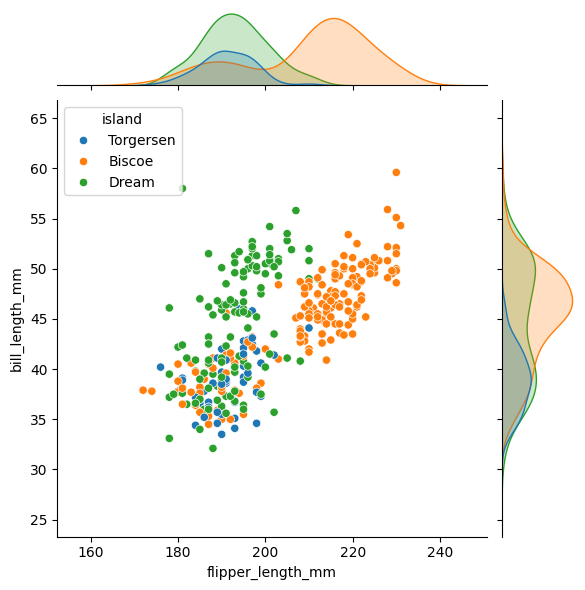

In [11]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="island")

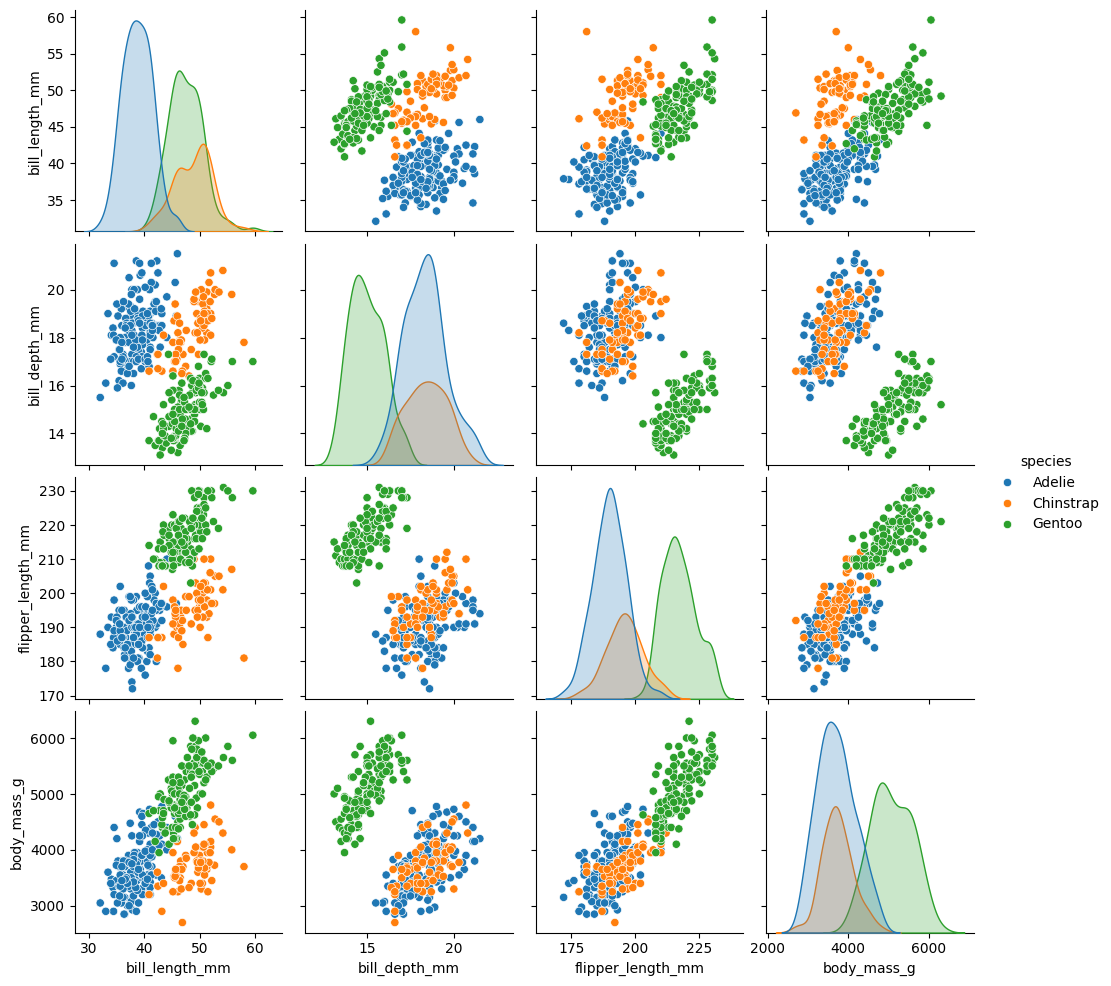

In [9]:
sns.pairplot(data=penguins, hue="species")

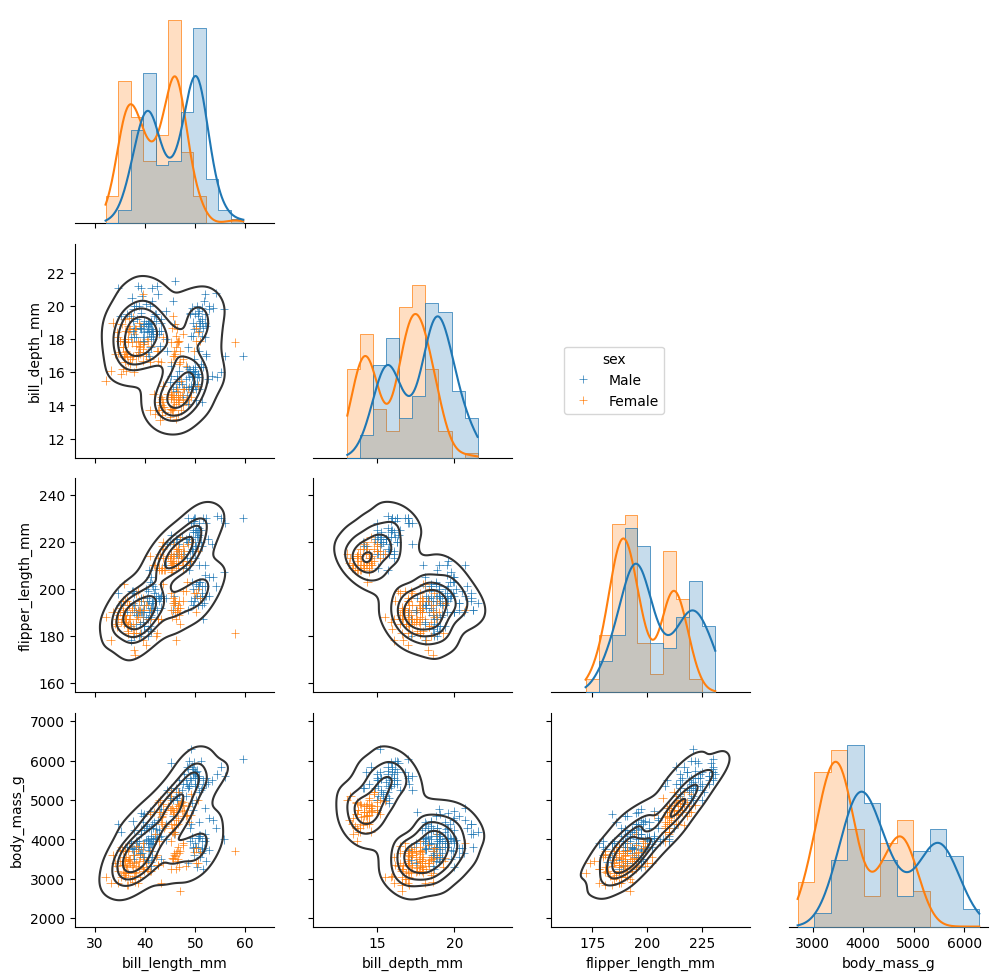

In [14]:
g = sns.PairGrid(penguins, hue="sex", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=.5, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

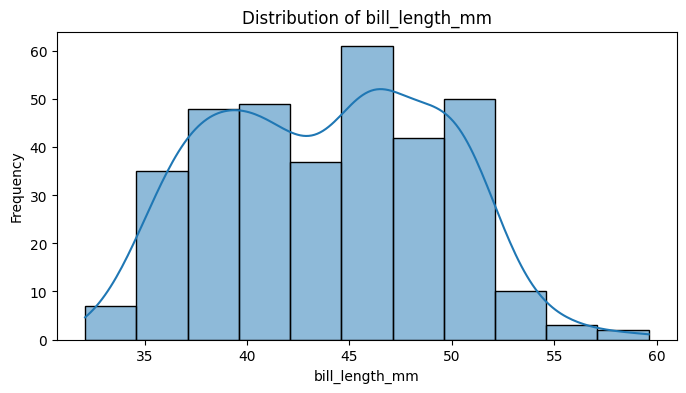

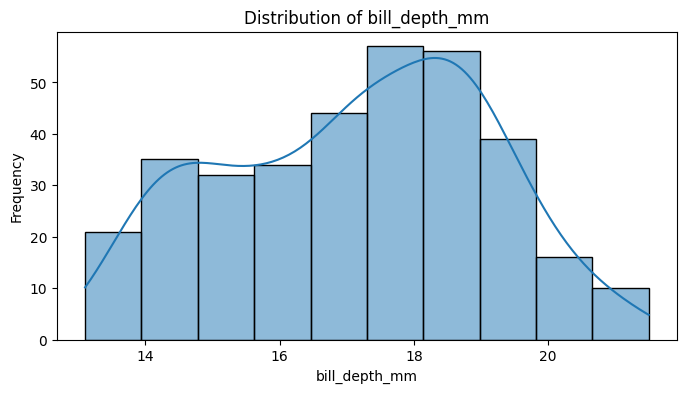

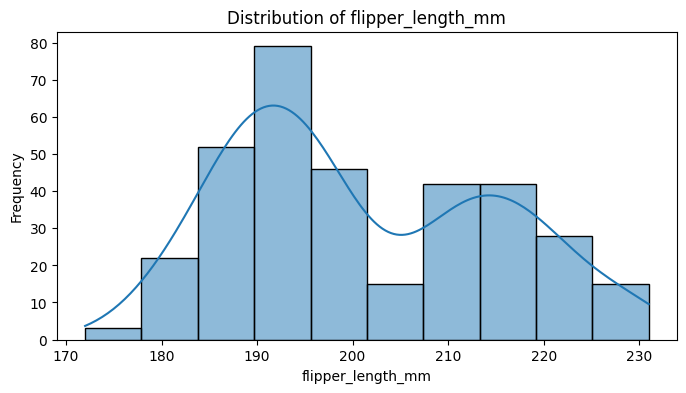

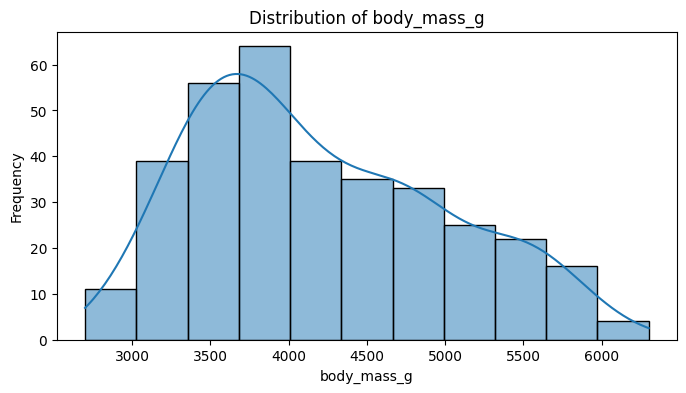

In [6]:
# Plot histograms for numerical features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(penguins_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.show()

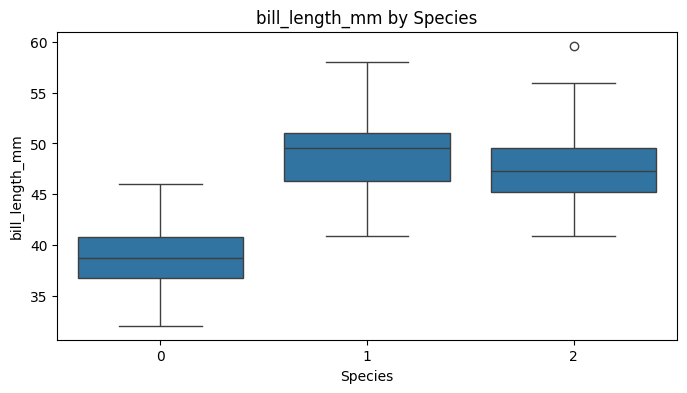

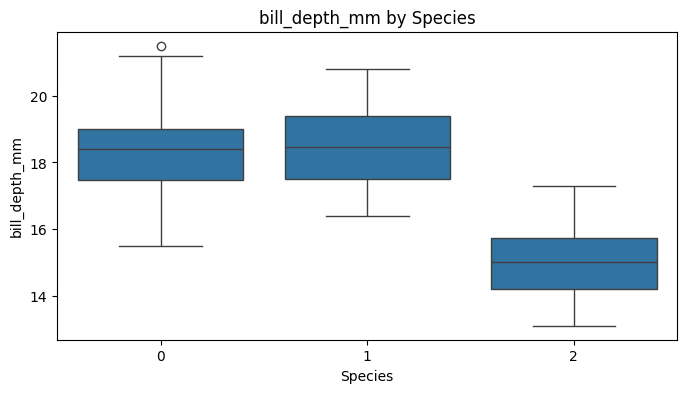

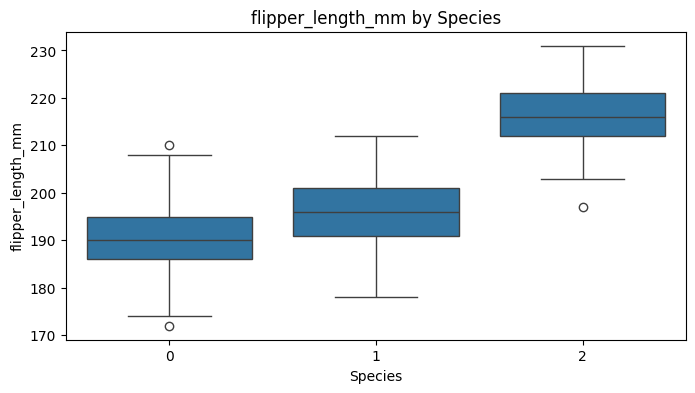

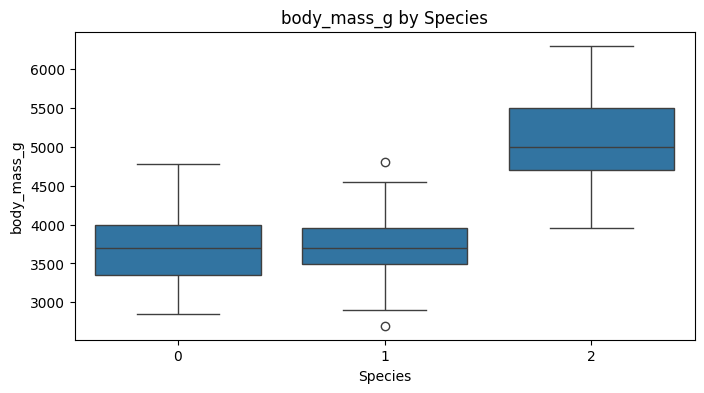

In [7]:
# Boxplots for numerical features by species
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='species', y=feature, data=penguins_df)
    plt.title(f'{feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.show()

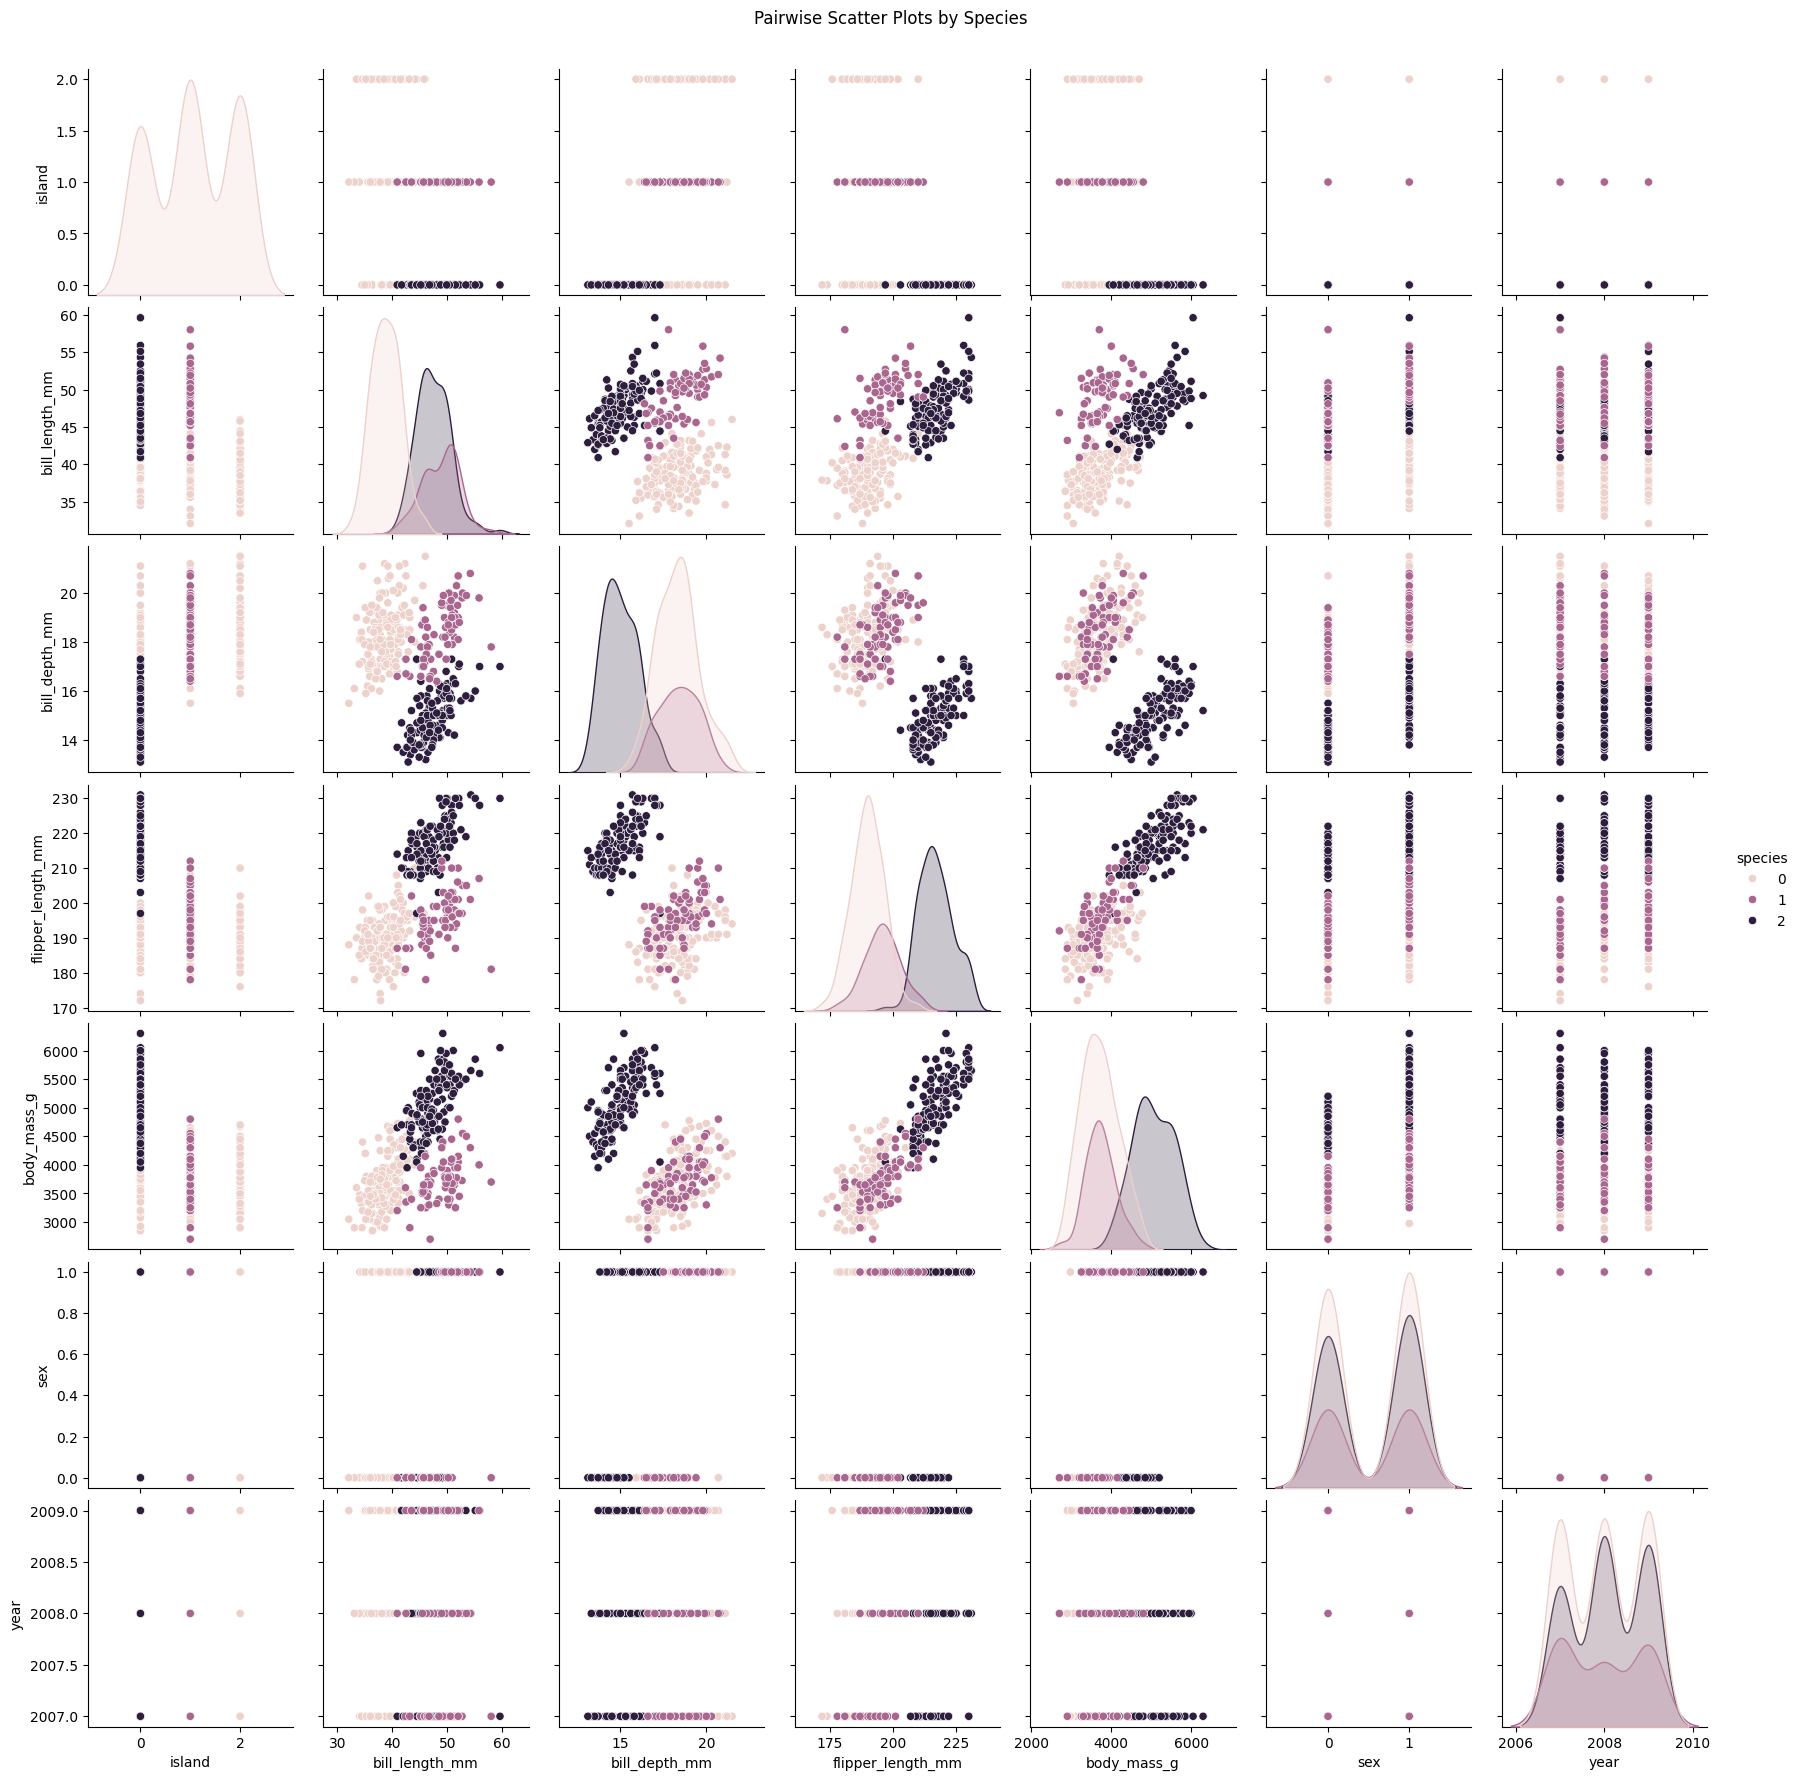

In [5]:
# Pairwise scatter plots
sns.pairplot(penguins_df, hue='species')
plt.suptitle('Pairwise Scatter Plots by Species', y=1.02)
plt.show()

**1. KNN**

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Classifier Results:
Accuracy: 0.7307692307692307

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77        46
           1       0.80      0.20      0.32        20
           2       0.93      0.74      0.82        38

    accuracy                           0.73       104
   macro avg       0.79      0.63      0.64       104
weighted avg       0.78      0.73      0.70       104


Confusion Matrix:
 [[44  1  1]
 [15  4  1]
 [10  0 28]]


**2. Decision Trees or Random Forests**

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=100)

# Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=100)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Decision Tree Classifier Results:
Accuracy: 0.9711538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      0.90      0.95        20
           2       1.00      0.97      0.99        38

    accuracy                           0.97       104
   macro avg       0.98      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104


Confusion Matrix:
 [[46  0  0]
 [ 2 18  0]
 [ 1  0 37]]

Random Forest Classifier Results:
Accuracy: 0.9519230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.80      0.89        20
           2       1.00      0.97      0.99        38

    accuracy                           0.95       104
   macro avg       0.97      0.92      0.94       104
weighted avg       0.96      0.95      0.95       104


Con

3. Support Vector Machines (SVM)

In [4]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Classifier Results:
Accuracy: 0.9711538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.95      0.95      0.95        20
           2       1.00      0.97      0.99        38

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104


Confusion Matrix:
 [[45  1  0]
 [ 1 19  0]
 [ 1  0 37]]


C. Regression Model
Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select two numerical features for regression
feature1 = 'bill_length_mm'
feature2 = 'flipper_length_mm'

# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train[[feature1, feature2]], y_train)

# Predictions
y_pred_lr = lr.predict(X_test[[feature1, feature2]])

# Evaluate the model
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))


Linear Regression Results:
R-squared: 0.7627685890065324
Mean Squared Error (MSE): 0.19020624964269142


**Baseline model**

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the DummyClassifier with strategy 'most_frequent'
baseline_model = DummyClassifier(strategy='most_frequent')

# Fit the baseline model
baseline_model.fit(X_train, y_train)

# Predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
print("Baseline Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))

Baseline Model Results:
Accuracy: 0.4423076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        46
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        38

    accuracy                           0.44       104
   macro avg       0.15      0.33      0.20       104
weighted avg       0.20      0.44      0.27       104


Confusion Matrix:
 [[46  0  0]
 [20  0  0]
 [38  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the DummyClassifier with strategy 'stratified'
baseline_stratified_model = DummyClassifier(strategy='stratified', random_state=42)

# Fit the stratified baseline model
baseline_stratified_model.fit(X_train, y_train)

# Predictions
y_pred_baseline_stratified = baseline_stratified_model.predict(X_test)

# Evaluate the stratified baseline model
print("Stratified Baseline Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline_stratified))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline_stratified))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline_stratified))

Stratified Baseline Model Results:
Accuracy: 0.33653846153846156

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.41      0.40        46
           1       0.23      0.15      0.18        20
           2       0.30      0.34      0.32        38

    accuracy                           0.34       104
   macro avg       0.31      0.30      0.30       104
weighted avg       0.33      0.34      0.33       104


Confusion Matrix:
 [[19  5 22]
 [ 9  3  8]
 [20  5 13]]
